**Part A**

Dataset shape: 494021 samples, 41 features
Running experiment 1/5
Running experiment 2/5
Running experiment 3/5
Running experiment 4/5
Running experiment 5/5

Results:
   Experiment     Loss on D  Loss on D using Transpose
0           1  5.864681e+06               1.249592e+07
1           2  5.667875e+06               1.399453e+07
2           3  5.757910e+06               1.288677e+07
3           4  5.681518e+06               1.391696e+07
4           5  5.763921e+06               1.357630e+07


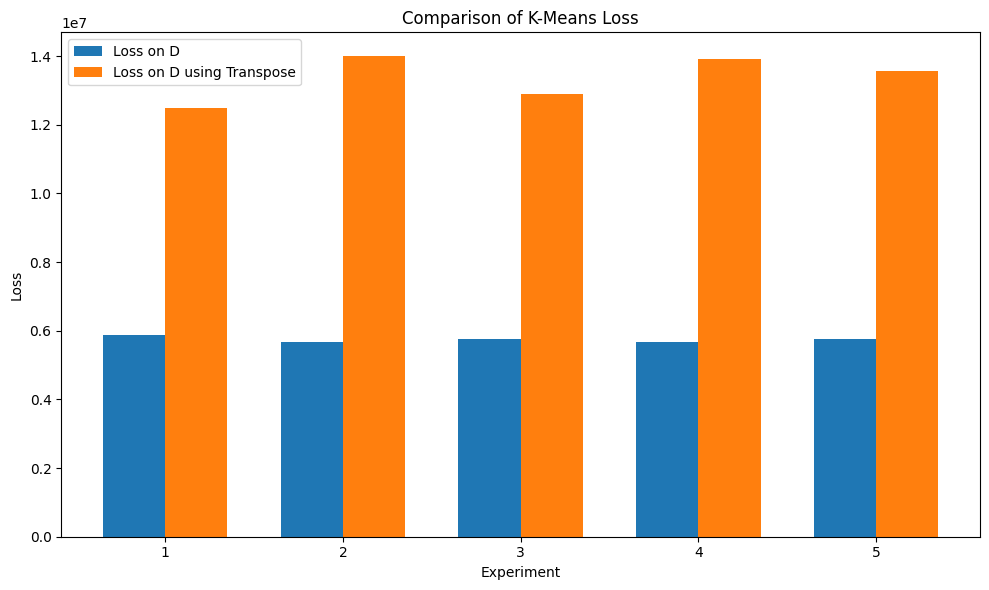


Summary Statistics:
       Experiment     Loss on D  Loss on D using Transpose
count    5.000000  5.000000e+00               5.000000e+00
mean     3.000000  5.747181e+06               1.337410e+07
std      1.581139  7.874401e+04               6.574968e+05
min      1.000000  5.667875e+06               1.249592e+07
25%      2.000000  5.681518e+06               1.288677e+07
50%      3.000000  5.757910e+06               1.357630e+07
75%      4.000000  5.763921e+06               1.391696e+07
max      5.000000  5.864681e+06               1.399453e+07


In [ ]:
import numpy as np
from sklearn.datasets import fetch_kddcup99
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

def load_data():
    # Fetch the data
    data = fetch_kddcup99()
    X = data.data

    # Convert to DataFrame for easier handling
    feature_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
                    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
                    'num_failed_logins', 'logged_in', 'num_compromised',
                    'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
                    'num_shells', 'num_access_files', 'num_outbound_cmds',
                    'is_host_login', 'is_guest_login', 'count', 'srv_count',
                    'serror_rate', 'srv_serror_rate', 'rerror_rate',
                    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
                    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

    X_df = pd.DataFrame(X, columns=feature_names)

    # Identify categorical columns
    categorical_columns = X_df.select_dtypes(include=['object']).columns

    # Encode categorical variables
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X_df[column] = label_encoders[column].fit_transform(X_df[column].astype(str))

    # Convert to numpy array
    X = X_df.to_numpy(dtype=float)

    # Only use StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X

def create_random_projection(d, k=20):
    return np.random.normal(0, 1/np.sqrt(k), (d, k))

def compute_kmeans_loss(X, centroids):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, len(centroids)))

    for i, centroid in enumerate(centroids):
        distances[:, i] = np.sum((X - centroid)**2, axis=1)

    # Take the minimum distance for each point and sum
    loss = np.sum(np.min(distances, axis=1))

    return loss

def main():
    # Load and prepare data
    X = load_data()
    n, d = X.shape
    print(f"Dataset shape: {n} samples, {d} features")

    # Parameters
    k_clusters = 15
    projection_dim = 20
    n_experiments = 5

    # Store results
    results = []

    for exp in range(n_experiments):
        print(f"Running experiment {exp + 1}/{n_experiments}")

        M = create_random_projection(d, projection_dim)
        X_projected = X @ M

        kmeans_projected = KMeans(n_clusters=k_clusters, random_state=42+exp)
        kmeans_projected.fit(X_projected)

        M_pinv = np.linalg.pinv(M)
        centroids_from_projected = kmeans_projected.cluster_centers_ @ M_pinv

        kmeans_original = KMeans(n_clusters=k_clusters, random_state=42+exp)
        kmeans_original.fit(X)

        loss_projected = compute_kmeans_loss(X, centroids_from_projected)
        loss_original = compute_kmeans_loss(X, kmeans_original.cluster_centers_)

        results.append({
            'Experiment': exp + 1,
            'Loss on D': loss_original,
            'Loss on D using Transpose': loss_projected
        })

    # Convert results to DataFrame and print
    results_df = pd.DataFrame(results)
    print("\nResults:")
    print(results_df)

    # Create bar plot
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    experiments = results_df['Experiment']

    plt.bar(experiments - bar_width/2,
            results_df['Loss on D'],
            bar_width,
            label='Loss on D',
            color='#1f77b4')
    plt.bar(experiments + bar_width/2,
            results_df['Loss on D using Transpose'],
            bar_width,
            label='Loss on D using Transpose',
            color='#ff7f0e')

    plt.xlabel('Experiment')
    plt.ylabel('Loss')
    plt.title('Comparison of K-Means Loss')
    plt.legend()
    plt.xticks(experiments)

    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.tight_layout()
    plt.show()

    print("\nSummary Statistics:")
    print(results_df.describe())

if __name__ == "__main__":
    main()

**Part B**

Shape of D: (494021, 41)

Running experiment 1/5...
Shape of E (Reduced Dataset): (410, 41)
Shape of M: (410, 494021)


Running experiment 2/5...
Shape of E (Reduced Dataset): (410, 41)
Shape of M: (410, 494021)


Running experiment 3/5...
Shape of E (Reduced Dataset): (410, 41)
Shape of M: (410, 494021)


Running experiment 4/5...
Shape of E (Reduced Dataset): (410, 41)
Shape of M: (410, 494021)


Running experiment 5/5...
Shape of E (Reduced Dataset): (410, 41)
Shape of M: (410, 494021)

MSE on (E, z): [776927.511598135, 1035815.4242709266, 931541.7247317337, 801892.6487726157, 1158757.4876195556]
MSE on (D, y): [212.41813325117334, 212.41813325117334, 212.41813325117334, 212.41813325117334, 212.41813325117334]


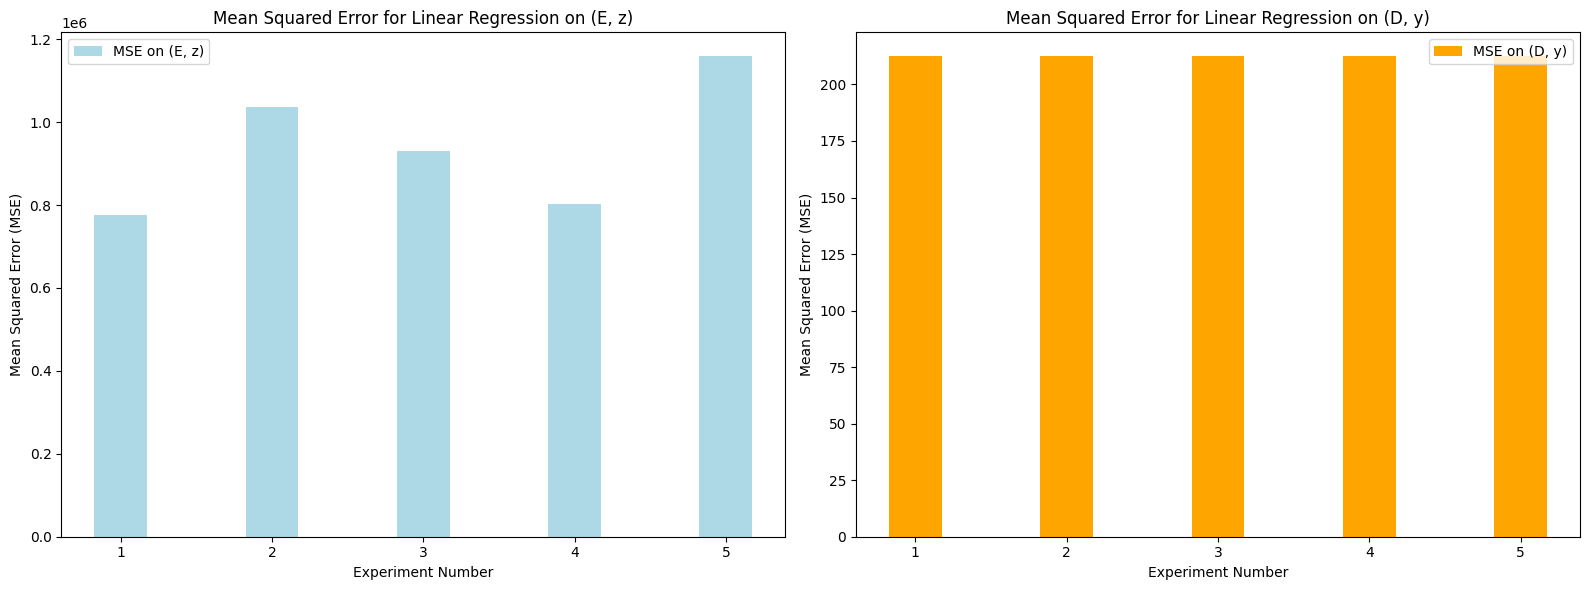

In [ ]:
import numpy as np
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
from scipy.sparse.linalg import norm as sparse_norm

# Set random seed for reproducibility
np.random.seed(42)

def create_sparse_jl_matrix(k, n, density=0.1):
    """Create a sparse Johnson-Lindenstrauss matrix"""
    return sparse_random(k, n, density=density).tocsr()

def compute_mse(X, y, coef):
    """Compute Mean Squared Error"""
    y_pred = X @ coef
    return np.mean((y - y_pred) ** 2)

# Load the KDD Cup dataset
data = fetch_kddcup99()
X_raw = data.data
y = data.target

# Convert symbolic features to numeric
# First, identify numeric and symbolic columns
symbolic_features = []
numeric_features = []
for i in range(X_raw.shape[1]):
    if isinstance(X_raw[0, i], (bytes, str)):
        symbolic_features.append(i)
    else:
        numeric_features.append(i)

# Convert to numeric array
X = np.zeros((X_raw.shape[0], X_raw.shape[1]))

# Copy numeric features directly
for i in numeric_features:
    X[:, i] = X_raw[:, i]

# Encode symbolic features
for i in symbolic_features:
    le = LabelEncoder()
    # Convert bytes to string if necessary
    col_data = [x.decode() if isinstance(x, bytes) else x for x in X_raw[:, i]]
    X[:, i] = le.fit_transform(col_data)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target to numeric
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Get dimensions
n_samples, n_features = X.shape
print(f"Shape of D: ({n_samples}, {n_features})")

# Define parameters for JL projection
k = 410  # Reduced dimension

# Initialize storage for results
mse_reduced = []  # MSE for (E, z)
mse_original = []  # MSE for (D, y)

# Run 5 experiments
for i in range(5):
    # Create sparse JL matrix M
    M = create_sparse_jl_matrix(k, n_samples)

    # Compute projected data
    # Remove .toarray() since M @ X is already a dense array
    E = M @ X  # E = MD
    # Remove .toarray() and keep .flatten() to ensure z is 1D
    z = (M @ y).flatten()  # z = My

    print(f"\nRunning experiment {i + 1}/5...")
    print(f"Shape of E (Reduced Dataset): {E.shape}")
    print(f"Shape of M: {M.shape}\n")


    # Fit linear regression on reduced data (E, z)
    lr_reduced = LinearRegression(fit_intercept=False)
    lr_reduced.fit(E, z)

    # Fit linear regression on original data (D, y)
    lr_original = LinearRegression(fit_intercept=False)
    lr_original.fit(X, y)

  # Compute MSE for both cases
    mse_reduced.append(compute_mse(X, y, lr_reduced.coef_))
    mse_original.append(compute_mse(X, y, lr_original.coef_))

# Print MSE values for comparison
print(f"MSE on (E, z): {mse_reduced}")
print(f"MSE on (D, y): {mse_original}")

# Create bar plot with logarithmic scale and separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(mse_reduced))
width = 0.35

# Subplot 1: MSE on (E, z)
ax1.bar(x, mse_reduced, width, label='MSE on (E, z)', color='lightblue')
ax1.set_xlabel('Experiment Number')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_title('Mean Squared Error for Linear Regression on (E, z)')
ax1.set_xticks(x)
ax1.set_xticklabels([f'{i+1}' for i in range(len(mse_reduced))])
ax1.legend()
# ax1.set_yscale('log')  # Uncomment for logarithmic scale

# Subplot 2: MSE on (D, y)
ax2.bar(x, mse_original, width, label='MSE on (D, y)', color='orange')
ax2.set_xlabel('Experiment Number')
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.set_title('Mean Squared Error for Linear Regression on (D, y)')
ax2.set_xticks(x)
ax2.set_xticklabels([f'{i+1}' for i in range(len(mse_original))])
ax2.legend()
# ax2.set_yscale('log')  # Uncomment for logarithmic scale

plt.tight_layout()
plt.show()